In [ ]:
# import necessry libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import torchvision
from pascal_dataset import PASCALDataset
import engine
from torch import optim
import torch
from engine import train_one_epoch, evaluate
import utils

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# one can change the directory to it's own dataset
!unzip /content/gdrive/MyDrive/PASCAL.zip

Archive:  /content/gdrive/MyDrive/PASCAL.zip
   creating: PASCAL/
   creating: PASCAL/test/
   creating: PASCAL/test/Labels/
  inflating: PASCAL/test/Labels/2008_006240_label.mat  
  inflating: PASCAL/test/Labels/2008_006109_label.mat  
  inflating: PASCAL/test/Labels/2008_006879_label.mat  
  inflating: PASCAL/test/Labels/2008_006195_label.mat  
  inflating: PASCAL/test/Labels/2008_007595_label.mat  
  inflating: PASCAL/test/Labels/2008_006220_label.mat  
  inflating: PASCAL/test/Labels/2008_006382_label.mat  
  inflating: PASCAL/test/Labels/2008_006567_label.mat  
  inflating: PASCAL/test/Labels/2008_007325_label.mat  
  inflating: PASCAL/test/Labels/2008_006092_label.mat  
  inflating: PASCAL/test/Labels/2008_006517_label.mat  
  inflating: PASCAL/test/Labels/2008_006637_label.mat  
  inflating: PASCAL/test/Labels/2008_007145_label.mat  
  inflating: PASCAL/test/Labels/2008_006519_label.mat  
  inflating: PASCAL/test/Labels/2008_007195_label.mat  
  inflating: PASCAL/test/Labels/200

In [ ]:
# Creaet datasets for train - test and validation data
dataset_test = PASCALDataset('/content/PASCAL/test')
dataset_train = PASCALDataset('/content/PASCAL/train')
dataset_val = PASCALDataset('/content/PASCAL/val')

In [ ]:
# get the model using our helper function
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:03<00:00, 45.9MB/s]


In [ ]:
def main():
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    num_classes = 20

    # define training and validation data loaders
    data_loader_train = torch.utils.data.DataLoader(
        dataset_train, batch_size=2, shuffle=True, num_workers=2,
        collate_fn=utils.collate_fn)

    data_loader_val = torch.utils.data.DataLoader(
        dataset_val, batch_size=1, shuffle=False, num_workers=2,
        collate_fn=utils.collate_fn)

    model.to(device)

    # construct an optimizer
    params = [p for p in model.parameters() if p.requires_grad]
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    num_epochs = 5

    for epoch in range(num_epochs):
        # train for one epoch, printing every 10 iterations
        train_one_epoch(model, optimizer, data_loader_train, device, epoch, print_freq=10)
        # evaluate on the test dataset
        evaluate(model, data_loader_val, device=device)

In [ ]:
# train the network
main()

Epoch: [0]  [  0/501]  eta: 0:31:13  lr: 0.000030  loss: 0.3080 (0.3080)  loss_classifier: 0.1363 (0.1363)  loss_box_reg: 0.1526 (0.1526)  loss_objectness: 0.0059 (0.0059)  loss_rpn_box_reg: 0.0132 (0.0132)  time: 3.7401  data: 0.1410  max mem: 2805
Epoch: [0]  [ 10/501]  eta: 0:06:41  lr: 0.000230  loss: 0.2624 (0.2727)  loss_classifier: 0.1113 (0.1101)  loss_box_reg: 0.1501 (0.1418)  loss_objectness: 0.0092 (0.0093)  loss_rpn_box_reg: 0.0076 (0.0115)  time: 0.8169  data: 0.0194  max mem: 3382
Epoch: [0]  [ 20/501]  eta: 0:05:24  lr: 0.000430  loss: 0.2509 (0.2729)  loss_classifier: 0.0876 (0.1040)  loss_box_reg: 0.1322 (0.1438)  loss_objectness: 0.0098 (0.0116)  loss_rpn_box_reg: 0.0076 (0.0135)  time: 0.5217  data: 0.0076  max mem: 3564
Epoch: [0]  [ 30/501]  eta: 0:05:01  lr: 0.000629  loss: 0.2384 (0.2664)  loss_classifier: 0.0867 (0.1042)  loss_box_reg: 0.1168 (0.1349)  loss_objectness: 0.0090 (0.0120)  loss_rpn_box_reg: 0.0124 (0.0153)  time: 0.5419  data: 0.0120  max mem: 3603


In [9]:
# Create dataloader for test data
data_loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=1,
                                               shuffle=False , collate_fn=utils.collate_fn)


In [10]:
# Define class ids and thier colors
class_ids = [
    "Bus",
    "Person",
    "Bicycle",
    "Car",
    "Motorbike",
    "Airplane",
    "Boat",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Bottle",
    "Bird",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple',
          'brown', 'pink', 'lavender', 'teal', 'olive', 'navy', 'gray',
          'maroon', 'mint', 'salmon']

In [14]:
dl =iter(data_loader_test)

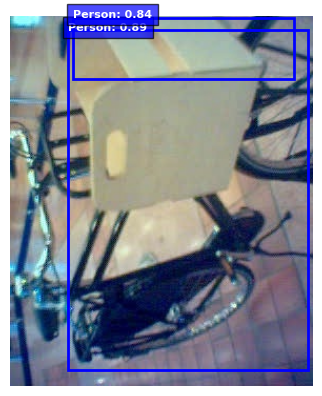

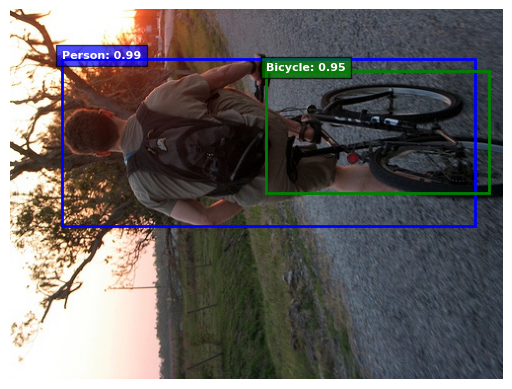

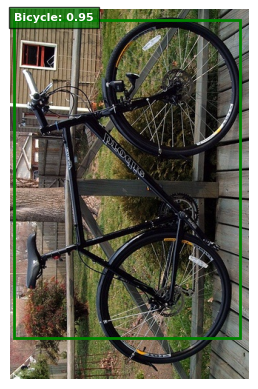

In [16]:
# get 3 inferances from test dataset
for i in range(3):
  images, labels = next(dl)
  model.to('cpu')
  with torch.no_grad():
      outputs = model(images)
  predicted_boxes = outputs[0]['boxes']
  predicted_labels = outputs[0]['labels']
  predicted_scores = outputs[0]['scores']
  fig, ax = plt.subplots(1)
  ax.imshow(np.array(images[0].T))
  for box, label_nb, score in zip(predicted_boxes, predicted_labels, predicted_scores):
      ymin, xmin, ymax, xmax = box
      label = class_ids[int(label_nb)]
      score = float(score)
      if score>0.70:
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor=colors[label_nb], linewidth=2))
        ax.text(xmin, ymin, f'{label}: {score:.2f}', fontsize=8, color='white', weight='bold',
            bbox=dict(facecolor=colors[label_nb], alpha=0.7))
        ax.axis('off')